In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import random

In [37]:
dim = 1

In [2]:
data = pd.read_csv('salary_data.csv')

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
x = data['YearsExperience']
y = data['Salary']
x = np.array(x)
x = x.reshape(len(x),dim)

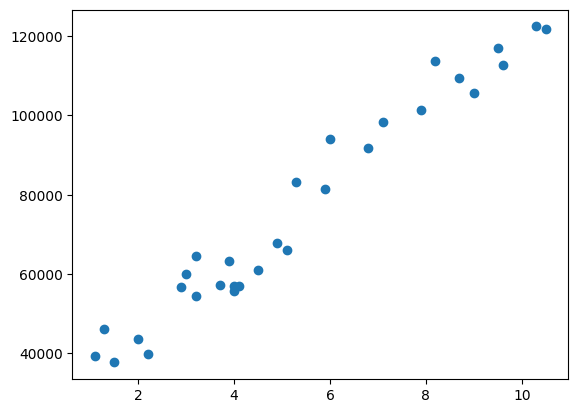

In [41]:
plt.scatter(x,y)

In [42]:
# function to intialize the weights and bias randomly
def initialize(dim,zeros=False):
    if(zeros):
        b = 0
        w = np.zeros(dim)
    
    else:
        b = np.random.random()
        w = np.random.rand(dim)
    return b, w

In [43]:
# dimentions of this data set input is one
b, w = initialize(dim)
print("bias ",b,"weights ",w)

bias  0.0488139076330365 weights  [0.80023312]


In [44]:
# function to predict the output
def predict_y(x,w,b):
    return b + np.dot(x,w)

y_hat = predict_y(x,w,b)
y_hat[0:1]

array([0.92907034])

In [57]:
# calculate the error sum((y-y_hat)**2)
import math
def get_cost(y,y_hat):
    y_resd=y - y_hat
    print(y_resd[0],y[0],y_hat[0])
    return np.sum(np.dot(y_resd.T, y_resd))
y_hat = predict_y(x,w,b)
get_cost(y,y_hat)

39342.0709296619 39343.0 0.929070338096787


195065514411.2113

In [58]:
print(x.shape)
print(y.shape)
print(y_hat.shape)
print(w.shape)

(30, 1)
(30,)
(30,)
(1,)


In [59]:
def predict(x,w,b):
    return x*w+b

In [60]:
def f_derivative_w_b(x,y,w,b):
    summation_w = 0
    summation_b = 0
    number_of_samples = len(y)
    for i in range(number_of_samples):
        summation_w += (predict(x[i],w,b)-y[i])*x[i]
        summation_b += (predict(x[i],w,b)-y[i])
    return summation_w /number_of_samples, summation_b /number_of_samples

In [94]:
def model_fit(x,y,w,b,lr,iteration):
    i = 0
    while(i < iteration):
        dev_w, dev_b = f_derivative_w_b(x,y,w,b)
        w = w - lr * dev_w
        w = b - lr * dev_b
        i +=1
        print(dev_b,dev_w)
    return w,b

In [100]:
b, w = initialize(dim,zeros=True)
weights, bias = model_fit(x,y,w,b,0.01,100)

[-76003.] [-477398.7]
[-71964.70726667] [-450024.95283333]
[-72179.27522056] [-451479.41126612]
[-72167.87450995] [-451402.13104139]
[-72168.4802677] [-451406.23719733]
[-72168.44808178] [-451406.01902358]
[-72168.44979192] [-451406.03061588]
[-72168.44970106] [-451406.02999994]
[-72168.44970588] [-451406.03003267]
[-72168.44970563] [-451406.03003093]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564] [-451406.03003102]
[-72168.44970564]

In [81]:
print(weights)
print(bias)

[75.98991709]
0.39106791704450194


In [82]:
print(get_cost(y,predict_y(x,weights,bias)))

39259.020023284334 39343.0 83.979976715668
192916474314.57373


In [83]:
i = 0
print(predict_y(x,weights,bias)[i])
print(y[i])

83.979976715668
39343.0


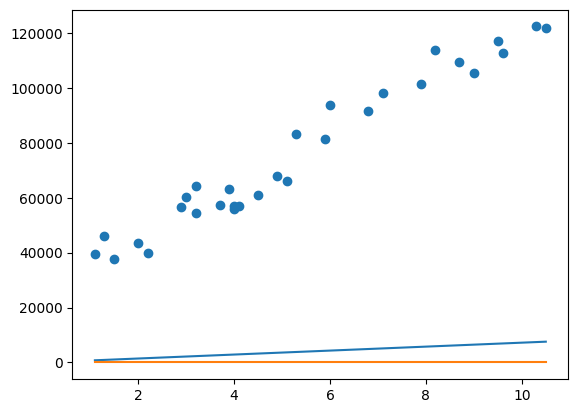

In [101]:
plt.scatter(x,y)
plt.plot(x,predict_y(x,weights,bias))
plt.plot(x,predict_y(x,w,b))